In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')

In [ ]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat       ambience creacions   sector 22   1.65         11956.0   
1          flat  shree vardhman victoria   sector 70   1.66         14254.0   
2          flat               bptp terra  sector 37d   1.60          7302.0   
3         house              independent   sector 11   1.35          3857.0   
4          flat  shree vardhman victoria   sector 70   1.23          9111.0   

     area  \
0  1380.0   
1  1165.0   
2  2191.0   
3  3500.0   
4  1350.0   

                                                                                                             areaWithType  \
0    Super Built up area 1380(128.21 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)   
1                                           Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)   
2  Super Built up area 2191(203.55 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)   
3                                                                                            Plot area 3500(325.16 sq.m.)   
4                                                                                  Super Built up area 1350(125.42 sq.m.)   

   bedRoom  bathroom balcony     additionalRoom  floorNum      facing  \
0        2         2       2  pooja room,others       9.0        East   
1        3         5       3       servant room       8.0       North   
2        4         3      3+             others       7.0       North   
3       10         6      3+      not available       3.0         NaN   
4        2         2       3         study room       1.0  North-East   

     agePossession  \
0  1 to 5 Year Old   
1  1 to 5 Year Old   
2  1 to 5 Year Old   
3     10+ Year Old   
4  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                             nearbyLocations  \
0                                                                              ['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']   
1  ['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals  Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']   
2                                                                                                                                                               ['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']   
3                                                                                                                                                                                                                                                                                                                                            

In [ ]:
df.shape

(3803, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3803 non-null   object 
 1   society          3802 non-null   object 
 2   sector           3803 non-null   object 
 3   price            3785 non-null   float64
 4   price_per_sqft   3785 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3803 non-null   object 
 7   bedRoom          3803 non-null   int64  
 8   bathroom         3803 non-null   int64  
 9   balcony          3803 non-null   object 
 10  additionalRoom   3803 non-null   object 
 11  floorNum         3784 non-null   float64
 12  facing           2698 non-null   object 
 13  agePossession    3802 non-null   object 
 14  nearbyLocations  3626 non-null   object 
 15  furnishDetails   2822 non-null   object 
 16  features         3168 non-null   object 
dtypes: float64(4),

In [ ]:
((df.isna().sum())/(df.shape[0])*100).sort_values(ascending=False)

facing             29.056008
furnishDetails     25.795425
features           16.697344
nearbyLocations     4.654220
floorNum            0.499606
price               0.473311
price_per_sqft      0.473311
area                0.473311
agePossession       0.026295
society             0.026295
property_type       0.000000
additionalRoom      0.000000
balcony             0.000000
bedRoom             0.000000
areaWithType        0.000000
sector              0.000000
bathroom            0.000000
dtype: float64

In [ ]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

property_type             society     sector  price  price_per_sqft    area  \
0          flat  ambience creacions  sector 22   1.65         11956.0  1380.0   

                                                                                                           areaWithType  \
0  Super Built up area 1380(128.21 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)   

   bedRoom  bathroom balcony     additionalRoom  floorNum facing  \
0        2         2       2  pooja room,others       9.0   East   

     agePossession  \
0  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                 nearbyLocations  \
0  ['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']   

                                                                                                                                                                                                                                               furnishDetails  \
0  ['4 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '17 Light', '1 Chimney', '4 AC', '1 Modular Kitchen', '2 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             features  
0  ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']

#1 AreaWithType

In [ ]:
df.sample(5)[['price','area','areaWithType']]


price     area  \
2669   1.50   1811.0   
611    0.38  65517.0   
1902   0.40    900.0   
3131  14.75   2844.0   
250    7.00   3000.0   

                                                                       areaWithType  
2669  Super Built up area 1811(168.25 sq.m.)Carpet area: 1570 sq.ft. (145.86 sq.m.)  
611                                              Carpet area: 64412 (5984.07 sq.m.)  
1902                                                 Carpet area: 900 (83.61 sq.m.)  
3131                                                    Plot area 316(264.22 sq.m.)  
250                                          Super Built up area 3000(278.71 sq.m.)

In [ ]:
# Extracts teh super built up area

def get_super_built_up_area(x):
  match = re.search(r'Super Built up area (\d+\.?\d*)',x)
  if match:
    return float(match.group(1))
  else:
    return None


In [ ]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [ ]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)


In [ ]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat       ambience creacions   sector 22   1.65         11956.0   
1          flat  shree vardhman victoria   sector 70   1.66         14254.0   
2          flat               bptp terra  sector 37d   1.60          7302.0   
3         house              independent   sector 11   1.35          3857.0   
4          flat  shree vardhman victoria   sector 70   1.23          9111.0   

     area  \
0  1380.0   
1  1165.0   
2  2191.0   
3  3500.0   
4  1350.0   

                                                                                                             areaWithType  \
0    Super Built up area 1380(128.21 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)   
1                                           Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)   
2  Super Built up area 2191(203.55 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)   
3                                                                                            Plot area 3500(325.16 sq.m.)   
4                                                                                  Super Built up area 1350(125.42 sq.m.)   

   bedRoom  bathroom balcony     additionalRoom  floorNum      facing  \
0        2         2       2  pooja room,others       9.0        East   
1        3         5       3       servant room       8.0       North   
2        4         3      3+             others       7.0       North   
3       10         6      3+      not available       3.0         NaN   
4        2         2       3         study room       1.0  North-East   

     agePossession  \
0  1 to 5 Year Old   
1  1 to 5 Year Old   
2  1 to 5 Year Old   
3     10+ Year Old   
4  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                             nearbyLocations  \
0                                                                              ['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']   
1  ['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals  Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']   
2                                                                                                                                                               ['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']   
3                                                                                                                                                                                                                                                                                                                                            

In [ ]:
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

In [ ]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat       ambience creacions   sector 22   1.65         11956.0   
1          flat  shree vardhman victoria   sector 70   1.66         14254.0   
2          flat               bptp terra  sector 37d   1.60          7302.0   
3         house              independent   sector 11   1.35          3857.0   
4          flat  shree vardhman victoria   sector 70   1.23          9111.0   

     area  \
0  1380.0   
1  1165.0   
2  2191.0   
3  3500.0   
4  1350.0   

                                                                                                             areaWithType  \
0    Super Built up area 1380(128.21 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)   
1                                           Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)   
2  Super Built up area 2191(203.55 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)   
3                                                                                            Plot area 3500(325.16 sq.m.)   
4                                                                                  Super Built up area 1350(125.42 sq.m.)   

   bedRoom  bathroom balcony     additionalRoom  floorNum      facing  \
0        2         2       2  pooja room,others       9.0        East   
1        3         5       3       servant room       8.0       North   
2        4         3      3+             others       7.0       North   
3       10         6      3+      not available       3.0         NaN   
4        2         2       3         study room       1.0  North-East   

     agePossession  \
0  1 to 5 Year Old   
1  1 to 5 Year Old   
2  1 to 5 Year Old   
3     10+ Year Old   
4  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                             nearbyLocations  \
0                                                                              ['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']   
1  ['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals  Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']   
2                                                                                                                                                               ['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']   
3                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [ ]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)


price property_type    area  \
531    0.60         house  1170.0   
915    0.90          flat  1950.0   
2151   0.80          flat  1361.0   
1324   0.38          flat   925.0   
2540   1.25          flat  1812.0   

                                                                                                                areaWithType  \
531                                                                                               Plot area 130(108.7 sq.m.)   
915   Super Built up area 1950(181.16 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1854 sq.ft. (172.24 sq.m.)   
2151     Super Built up area 1361(126.44 sq.m.)Built Up area: 1089 sq.ft. (101.17 sq.m.)Carpet area: 705 sq.ft. (65.5 sq.m.)   
1324                                                   Built Up area: 925 (85.94 sq.m.)Carpet area: 800 sq.ft. (74.32 sq.m.)   
2540  Super Built up area 1805(167.69 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
531                   NaN            NaN          NaN  
915                1950.0         1900.0       1854.0  
2151               1361.0         1089.0        705.0  
1324                  NaN          925.0        800.0  
2540               1805.0         1350.0       1100.0

In [ ]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(534, 7)

In [ ]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head()


price property_type    area                  areaWithType  \
3    1.35         house  3500.0  Plot area 3500(325.16 sq.m.)   
9   10.00         house  4500.0   Plot area 502(419.74 sq.m.)   
11   7.50         house  1935.0   Plot area 215(179.77 sq.m.)   
23  17.00         house  4500.0  Plot area 4500(418.06 sq.m.)   
50  11.50         house  4680.0   Plot area 520(434.79 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
3                   NaN            NaN          NaN  
9                   NaN            NaN          NaN  
11                  NaN            NaN          NaN  
23                  NaN            NaN          NaN  
50                  NaN            NaN          NaN

In [ ]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [ ]:
all_nan_df.head()


price property_type    area                  areaWithType  \
3    1.35         house  3500.0  Plot area 3500(325.16 sq.m.)   
9   10.00         house  4500.0   Plot area 502(419.74 sq.m.)   
11   7.50         house  1935.0   Plot area 215(179.77 sq.m.)   
23  17.00         house  4500.0  Plot area 4500(418.06 sq.m.)   
50  11.50         house  4680.0   Plot area 520(434.79 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
3                   NaN            NaN          NaN  
9                   NaN            NaN          NaN  
11                  NaN            NaN          NaN  
23                  NaN            NaN          NaN  
50                  NaN            NaN          NaN

In [ ]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [ ]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [ ]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [ ]:
all_nan_df.head()


price property_type    area                  areaWithType  \
3    1.35         house  3500.0  Plot area 3500(325.16 sq.m.)   
9   10.00         house  4500.0   Plot area 502(419.74 sq.m.)   
11   7.50         house  1935.0   Plot area 215(179.77 sq.m.)   
23  17.00         house  4500.0  Plot area 4500(418.06 sq.m.)   
50  11.50         house  4680.0   Plot area 520(434.79 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
3                   NaN         3500.0          NaN  
9                   NaN          502.0          NaN  
11                  NaN          215.0          NaN  
23                  NaN         4500.0          NaN  
50                  NaN          520.0          NaN

In [ ]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']


In [ ]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)


In [ ]:
all_nan_df.head()

price property_type    area                  areaWithType  \
3    1.35         house  3500.0  Plot area 3500(325.16 sq.m.)   
9   10.00         house  4500.0   Plot area 502(419.74 sq.m.)   
11   7.50         house  1935.0   Plot area 215(179.77 sq.m.)   
23  17.00         house  4500.0  Plot area 4500(418.06 sq.m.)   
50  11.50         house  4680.0   Plot area 520(434.79 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
3                   NaN         3500.0          NaN  
9                   NaN         4518.0          NaN  
11                  NaN         1935.0          NaN  
23                  NaN         4500.0          NaN  
50                  NaN         4680.0          NaN

In [ ]:
# update the original dataframe
df.update(all_nan_df)

In [ ]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [ ]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room                            12
pooja room,store room,study room,servant room      12
study room,servant room,store room                 11
pooja room,servant room,others                     11
study room,pooja room                              10
servant room,study room,pooja room,store room      10
store room,servant room                             8
study room,servant room,pooja room,store room       8
study room,pooja room,servant room                  7
pooja room,servant room,store room                  7
pooja room,study room,store room                    7
study room,servant room,others                      7
others,servant room                                 6
servant room,pooja room,store room                  6
store room,pooja room                               5
study room,servant room,store room,pooja room       5
pooja room,servant room,study room,store room       5
servant room,store room,pooja room                  4
study room,servant room,pooja room                  4
pooja room,study room,others                        4
study room,pooja room,store room                    4
study room,pooja room,servant room,store room       3
pooja room,study room,store room,servant room       3
servant room,pooja room,study room,store room       3
servant room,others,pooja room                      3
servant room,study room,pooja room                  3
servant room,study room,store room                  2
store room,pooja room,servant room                  2
servant room,others,store room,pooja room           2
study room,pooja room,store room,servant room       2
study room,store room                               2
store room,pooja room,study room,servant room       2
store room,pooja room,study room                    2
store room,study room,servant room                  1
study room,store room,pooja room                    1
store room,pooja room,servant room,study room       1
store room,servant room,pooja room                  1
others,study room                                   1
store room,servant room,study room,pooja room       1
servant room,pooja room,store room,study room       1
study room,others,servant room                      1
servant room,pooja room,study room                  1
store room,study room                               1
servant room,store room,study room,pooja room       1
pooja room,store room,servant room                  1
servant room,study room,store room,pooja room       1
servant room,study room,others                      1
Name: count, dtype: int64

In [ ]:
cols = ['study room','servant room','store room','pooja room','others']

for col in cols:
  df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [ ]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]


additionalRoom  study room  servant room  \
3266                       not available           0             0   
134                        not available           0             0   
3765  pooja room,study room,servant room           1             1   
649   pooja room,study room,servant room           1             1   
2943                        servant room           0             1   

      store room  pooja room  others  
3266           0           0       0  
134            0           0       0  
3765           0           1       0  
649            0           1       0  
2943           0           0       0

#3 agePossession

In [ ]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Oct-24                   7
Aug-23                   7
Jan-24                   7
Dec-25                   7
Nov-23                   5
Jun-24                   5
Jul-24                   4
Aug-24                   4
Sep-23                   4
By 2025                  4
Feb-24                   3
Oct-23                   3
May-24                   3
Jan-25                   3
Nov-24                   3
Jul-27                   2
By 2027                  2
Dec 2023                 2
Mar-25                   2
Aug-25                   2
Jun-27                   2
Sep-25                   2
Jul-25                   2
Oct-25                   2
Apr-26                   2
Jun 2024                 2
Jan-26                   2
Dec-26                   2
Oct 2024                 1
Jan 2024                 1
Jan-28                   1
Oct 2023                 1
Jun-25                   1
Nov-25                   1
Mar-26                   1
Apr-24                   1
Dec 2024                 1
Jan-27                   1
Sep-27                   1
Jul-26                   1
Aug-26                   1
Name: count, dtype: int64

In [ ]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [ ]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)


In [ ]:
df['agePossession'].value_counts()


agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              476
Old Property           310
Under Construction     140
Name: count, dtype: int64

In [ ]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat       ambience creacions   sector 22   1.65         11956.0   
1          flat  shree vardhman victoria   sector 70   1.66         14254.0   
2          flat               bptp terra  sector 37d   1.60          7302.0   
3         house              independent   sector 11   1.35          3857.0   
4          flat  shree vardhman victoria   sector 70   1.23          9111.0   

     area  \
0  1380.0   
1  1165.0   
2  2191.0   
3  3500.0   
4  1350.0   

                                                                                                             areaWithType  \
0    Super Built up area 1380(128.21 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)   
1                                           Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)   
2  Super Built up area 2191(203.55 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)   
3                                                                                            Plot area 3500(325.16 sq.m.)   
4                                                                                  Super Built up area 1350(125.42 sq.m.)   

   bedRoom  bathroom balcony     additionalRoom  floorNum      facing  \
0        2         2       2  pooja room,others       9.0        East   
1        3         5       3       servant room       8.0       North   
2        4         3      3+             others       7.0       North   
3       10         6      3+      not available       3.0         NaN   
4        2         2       3         study room       1.0  North-East   

    agePossession  \
0  Relatively New   
1  Relatively New   
2  Relatively New   
3    Old Property   
4  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                             nearbyLocations  \
0                                                                              ['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']   
1  ['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals  Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']   
2                                                                                                                                                               ['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']   
3                                                                                                                                                                                                                                                                                                                                                  

#4 furnishDetails

In [ ]:
df['furnishDetails'].value_counts()

furnishDetails
[]                                                                                                                                                                                                                                                                       421
['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']     199
['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      72
['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']        60
['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      17
['5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      12
['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      12
['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       11
['10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       7
['6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']        7
['1 Fan', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']         7
['1 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       6
['3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       6
['2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       6
['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'N

In [ ]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [ ]:
furnishings_df.shape


(3803, 19)

In [ ]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)


<ipython-input-46-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [ ]:
furnishings_df.sample(5)


Washing Machine  Water Purifier  TV  Microwave  Geyser  Chimney  \
2495                0               0   0          0       0        0   
1328                0               1   0          0       3        1   
3538                0               0   0          0       0        0   
2949                0               0   0          0       0        0   
2118                0               0   0          0       0        0   

      Exhaust Fan  Fridge  AC  Light  Fan  Sofa  Bed  Dining Table  Stove  \
2495            0       0   0      0    0     0    0             0      0   
1328            1       0   0      5    4     0    0             0      0   
3538            0       0   0      0    0     0    0             0      0   
2949            0       0   0      0    0     0    0             0      0   
2118            0       0   0      0    0     0    0             0      0   

      Wardrobe  Curtains  Modular Kitchen  
2495         0         0                0  
1328         3         1                1  
3538         0         0                0  
2949         0         0                0  
2118         0         0                0

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

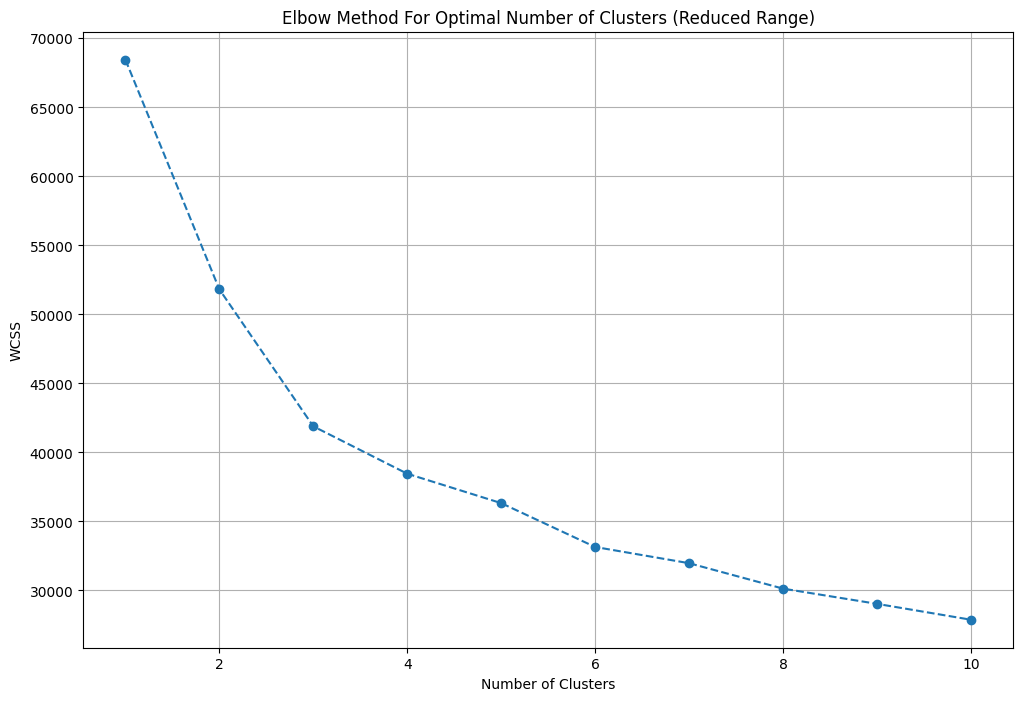

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [ ]:
df = df.iloc[:,:-18]


In [ ]:
df['furnishing_type'] = cluster_assignments


In [ ]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

furnishDetails  \
3229  ['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
2698       ['1 Exhaust Fan', '4 Geyser', '9 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
2193       ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
2915     ['6 Fan', '1 Exhaust Fan', '3 Geyser', '9 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
908     ['1 Exhaust Fan', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   

      furnishing_type  
3229                1  
2698                0  
2193                0  
2915                1  
908                 1

#5 Features

In [ ]:
df['features'].value_counts()

features
['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              290
['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']                      91
['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']     64
['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               45
['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 36
['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']                                                                                                                                                                                                                                                                                                                      

In [ ]:
df['features'].isna().sum()

635

In [ ]:
app_df = pd.read_csv('/content/appartments.csv')

In [ ]:
app_df.head()

PropertyName  \
0           Smartworld One DXP   
1                    M3M Crown   
2  Adani Brahma Samsara Vilasa   
3                   Sobha City   
4     Signature Global City 93   

                                          PropertySubName  \
0            2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1               3, 4 BHK Apartment in Sector 111, Gurgaon   
2  Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon   
3            2, 3, 4 BHK Apartment in Sector 108, Gurgaon   
4         2, 3 BHK Independent Floor in Sector 93 Gurgaon   

                                                                                                                                                  NearbyLocations  \
0                                                           ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']   
1                  ['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']   
2  ['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']   
3                                                          ['The Shikshiyan School', 'WTC Plaza', 'Luxus Haritma Resort', 'BSF Golf Course', 'Dwarka Expressway']   
4                     ['Pranavananda Int. School', 'DLF Site central office', 'Holiday Inn Gurugram Sector 90', 'Krishna Hospital', 'Royal Institute Of Science']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   LocationAdvantages  \
0                                        {'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}   
1                                 {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}   
2  {'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}   
3                                                                                                                                      {'The Shikshiyan School': '2.9 KM', 'WTC Plaza': '4 KM', 'Luxus Haritma Resort': '4.2 KM', 'BSF Golf Course': '4.7 KM', 'Dwarka Expressway': '5.1 Km', 'Rions Hospital': '5.6 Km', 'Gurgaon': '5.9 KM', 'The NorthCap University': '9.2 KM',

In [ ]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()


In [ ]:
temp_df = df[df['features'].isnull()]


In [ ]:
temp_df.shape


(635, 26)

In [ ]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']


In [ ]:
df.loc[temp_df.index,'features'] = x.values


In [ ]:
df['features'].isnull().sum()


481

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])



In [ ]:
# # Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [ ]:
features_binary_df.sample(5)

24/7 Power Backup  24/7 Water Supply  24x7 Security  ATM  \
840                   0                  0              0    0   
1269                  0                  0              0    0   
1079                  0                  0              0    0   
3429                  0                  0              0    0   
1822                  0                  0              0    0   

      Aerobics Centre  Air Hockey  Airy Rooms  Amphitheatre  \
840                 0           0           0             0   
1269                0           0           1             0   
1079                0           0           0             0   
3429                0           0           0             0   
1822                0           0           0             0   

      Automated Car Wash  Badminton Court  Bank Attached Property  \
840                    0                0                       0   
1269                   0                0                       0   
1079                   0                0                       0   
3429                   0                0                       0   
1822                   0                0                       0   

      Banquet Hall  Bar/Chill-Out Lounge  Barbecue  Basketball Court  \
840              0                     0         0                 0   
1269             0                     0         0                 0   
1079             0                     0         0                 0   
3429             0                     0         0                 0   
1822             0                     0         0                 0   

      Beach Volley Ball Court  Billiards  Bowling Alley  Bus Shelter  \
840                         0          0              0            0   
1269                        0          0              0            0   
1079                        0          0              0            0   
3429                        0          0              0            0   
1822                        0          0              0            0   

      Business Lounge  CCTV Camera Security  Cafeteria  Car Parking  \
840                 0                     0          0            0   
1269                0                     0          0            0   
1079                0                     0          0            0   
3429                0                     0          0            0   
1822                0                     0          0            0   

      Car wash area  Card Room  Centrally Air Conditioned  Changing Area  \
840               0          0                          0              0   
1269              0          0                          0              0   
1079              0          0                          0              0   
3429              0          0                          0              0   
1822              0          0                          0              0   

      Children's Play Area  Cigar Lounge  Clinic  Club House  \
840                      0             0       0           0   
1269                     0             0       0           0   
1079                     0             0       0           0   
3429                     0             0       0           0   
1822                     0             0       0           0   

      Club house / Community Center  Community Hall  Concierge Service  \
840                               0               0                  0   
1269                              1               0                  0   
1079                              0               0                  0   
3429                              0               0                  0   
1822                              1               0                  0   

      Conference room  Creche/Day care  Cricket Pitch  Doctor on Call  \
840                 0                0              0               0   
1269                0                0              0               0   
1079            

In [ ]:
features_binary_df.shape


(3803, 130)

In [ ]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [ ]:
luxury_score

0       133
1       108
2       139
3         0
4        43
5        49
6        22
7        24
8       105
9        49
10       16
11       72
12      112
13       71
14      125
15        0
16      165
17       61
18      126
19      174
20       58
21       61
22       21
23      152
24       49
25      148
26      152
27       45
28      174
29       51
30      134
31        0
32       49
33      103
34       67
35      140
36       49
37       53
38       49
39        7
40       49
41       60
42       16
43       79
44      152
45        0
46       88
47       86
48       79
49      174
50       84
51      174
52       72
53      158
54       44
55        0
56      165
57        0
58      144
59       49
60       33
61      165
62      174
63      174
64       28
65       60
66       39
67      103
68      137
69       95
70       49
71      165
72       29
73       55
74       77
75       49
76      158
77      103
78      135
79       72
80        0
81      109
82      174
83      103
84       32
85      174
86       91
87      174
88       20
89       81
90        0
91      174
92       45
93       61
94       42
95        0
96       49
97      126
98       49
99       21
100      70
101       0
102       0
103     112
104      80
105      66
106      49
107      88
108     152
109     174
110      45
111       0
112      43
113      84
114     150
115      65
116      49
117      35
118      65
119      12
120     157
121      63
122      14
123      76
124      38
125     118
126      15
127       0
128      90
129       0
130     159
131     159
132     117
133      72
134       0
135      45
136      14
137     159
138     148
139      42
140      36
141      74
142      38
143      45
144       0
145     149
146     127
147     167
148     119
149      58
150      36
151      21
152      75
153     158
154      65
155       0
156      27
157      40
158     101
159      61
160     108
161     106
162      72
163     110
164       0
165     174
166      88
167      67
168     104
169     110
170     102
171     119
172     174
173     165
174     109
175       0
176      65
177      26
178      78
179     120
180      45
181      24
182       7
183      15
184      68
185       0
186      49
187      52
188      49
189      13
190      67
191     174
192      95
193      47
194     126
195      74
196       0
197      15
198       0
199     166
200     174
201      73
202     117
203      81
204     174
205       0
206      87
207     174
208      31
209     107
210       0
211      93
212     174
213      94
214      55
215      35
216      38
217      49
218       0
219      28
220     174
221      45
222      42
223     161
224      97
225     165
226       7
227     127
228     174
229       0
230      49
231      95
232      37
233     111
234     110
235      35
236     165
237      49
238      49
239       0
240      69
241       0
242       0
243      49
244      72
245      97
246       0
247      97
248      20
249     104
250     108
251       0
252       0
253     128
254     149
255     165
256      79
257     160
258       0
259      24
260      16
261     133
262     149
263     153
264     174
265      38
266      76
267      49
268       8
269       7
270     103
271       0
272      50
273      41
274      82
275      21
276      24
277      31
278      65
279      21
280     103
281      15
282      37
283       0
284      45
285     115
286      38
287     148
288       0
289      38
290       9
291      50
292       0
293      44
294       0
295     104
296     100
297     174
298     111
299     142
300      38
301      67
302     174
303      51
304      61
305      35
306       0
307      49
308     174
309      72
310      49
311     158
312      74
313       0
314     158
315     130
316      16
317      45
318     156
319      49
320       7
321     125
322      43
323      71
324       0
325     158
326       0
327       0
328      32
329      60
330      92
331     127
332      68
333 

In [ ]:
df['luxury_score'] = luxury_score

In [ ]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat       ambience creacions   sector 22   1.65         11956.0   
1          flat  shree vardhman victoria   sector 70   1.66         14254.0   
2          flat               bptp terra  sector 37d   1.60          7302.0   
3         house              independent   sector 11   1.35          3857.0   
4          flat  shree vardhman victoria   sector 70   1.23          9111.0   

     area  \
0  1380.0   
1  1165.0   
2  2191.0   
3  3500.0   
4  1350.0   

                                                                                                             areaWithType  \
0    Super Built up area 1380(128.21 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)   
1                                           Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)   
2  Super Built up area 2191(203.55 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.)   
3                                                                                            Plot area 3500(325.16 sq.m.)   
4                                                                                  Super Built up area 1350(125.42 sq.m.)   

   bedRoom  bathroom balcony     additionalRoom  floorNum      facing  \
0        2         2       2  pooja room,others       9.0        East   
1        3         5       3       servant room       8.0       North   
2        4         3      3+             others       7.0       North   
3       10         6      3+      not available       3.0         NaN   
4        2         2       3         study room       1.0  North-East   

    agePossession  \
0  Relatively New   
1  Relatively New   
2  Relatively New   
3    Old Property   
4  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                             nearbyLocations  \
0                                                                              ['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']   
1  ['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals  Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']   
2                                                                                                                                                               ['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']   
3                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [ ]:
df.shape


(3803, 23)

In [ ]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)
